In [ ]:
# amirhossein babaeayan 401131002

In [1]:
#a
import numpy as np
import pandas as pd
df = pd.read_excel('AirQualityUCI.xlsx')
print(df.shape)
df.head(10)

(9357, 15)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [2]:
dfv = df
df.dropna(inplace=True)
df.drop('Time', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)
print(df.shape)

(9357, 13)


In [3]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [4]:
y = df.iloc[:, 1]
df.drop('PT08.S1(CO)', axis=1, inplace=True)
X = df.iloc[:, :]

In [27]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("shape of y_test (test size = 0.2) ===> {}".format(y_test.shape))
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

shape of y_test (test size = 0.2) ===> (1872,)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)
print("X_test after fit with  Stabdard Scaler: ")
X_test

X_test after fit with  Stabdard Scaler: 


array([[ 0.44960673, -0.30251329,  0.10674331, ...,  0.36879468,
        -0.08296015,  0.20323861],
       [-2.16929432, -0.30251329,  0.07093299, ...,  0.30065358,
         0.21320091,  0.20929107],
       [ 0.46651965, -0.30251329,  0.30725785, ...,  0.348993  ,
        -0.13420932,  0.1996731 ],
       ...,
       [ 0.44570375, -0.30251329,  0.07750515, ...,  0.39674999,
         0.18018461,  0.21763488],
       [ 0.46391767, -0.30251329,  0.23621225, ...,  0.30240079,
        -0.3214659 ,  0.18988233],
       [-2.16929432, -0.30251329,  0.17670794, ...,  0.21620521,
         0.61186032,  0.21388668]])

In [25]:
list1 = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.8, 1, 10, 100, 500, 1000]

In [29]:
model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train_val, y_train_val)
y_pred_val_ridge = model_ridge.predict(X_test)
rmse_ridge = mean_squared_error(y_test, y_pred_val_ridge, squared=False)

In [30]:
print(rmse_ridge)

71.72920873680025


In [ ]:
r2_score(y_test, y_pred_val_ridge)

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
best_rmse_ridge = float('inf')
best_alpha_ridge = None
for alpha in list1:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)
    y_pred_val_ridge = model_ridge.predict(X_val)
    rmse_ridge = mean_squared_error(y_val, y_pred_val_ridge, squared=False)
    if rmse_ridge < best_rmse_ridge:
        best_rmse_ridge = rmse_ridge
        best_alpha_ridge = alpha
print("best_rmse_ridge: {}, best_alpha_ridge = {}".format(best_rmse_ridge, best_alpha_ridge))

best_rmse_ridge: 72.9232169211308, best_alpha_ridge = 10


In [20]:
from sklearn.linear_model import Lasso
best_rmse_lasso = float('inf')
best_alpha_lasso = None
for alpha in list1:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train)
    y_pred_val_lasso = model_lasso.predict(X_val)
    rmse_lasso = mean_squared_error(y_val, y_pred_val_lasso, squared=False)
    if rmse_lasso < best_rmse_lasso:
        best_rmse_lasso = rmse_lasso
        best_alpha_lasso = alpha
print("best_rmse_lasso: {}, best_alpha_lasso = {}".format(best_rmse_lasso, best_alpha_lasso))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.276e+07, tolerance: 6.175e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.394e+06, tolerance: 6.175e+04
  model = cd_fast.enet_coordinate_descent(


best_rmse_lasso: 72.91989293873218, best_alpha_lasso = 0.2


In [22]:
from sklearn.linear_model import ElasticNet
best_rmse_elastic = float('inf')
best_alpha_elastic = None
best_l1_ratio_elastic = None
for alpha in list1:
    for l1_ratio in [0.1, 0.3, 0.5, 0.7, 0.9]:
        model_elastic = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model_elastic.fit(X_train, y_train)
        y_pred_val_elastic = model_elastic.predict(X_val)
        rmse_elastic = mean_squared_error(y_val, y_pred_val_elastic, squared=False)
        if rmse_elastic < best_rmse_elastic:
            best_rmse_elastic = rmse_elastic
            best_alpha_elastic = alpha
            best_l1_ratio_elastic = l1_ratio
print("best_rmse_elastic: {}, best_alpha_elastic = {}, best_l1_ratio_elastic = {}".format(best_rmse_elastic, best_alpha_elastic, best_l1_ratio_elastic))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.387e+07, tolerance: 6.175e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.365e+07, tolerance: 6.175e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.336e+07, tolerance: 6.175e+04

best_rmse_elastic: 72.90776945409465, best_alpha_elastic = 0.01, best_l1_ratio_elastic = 0.9


In [11]:
model_ridge_final = Ridge(alpha=best_alpha_ridge)
model_ridge_final.fit(X_train_val, y_train_val)
print("model_ridge_final.fit complete.")

model_ridge_final.fit complete.


In [12]:
model_lasso_final = Lasso(alpha=best_alpha_lasso)
model_lasso_final.fit(X_train_val, y_train_val)
print("model_lasso_final.fit complete.")

model_lasso_final.fit complete.


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.788e+07, tolerance: 8.146e+04
  model = cd_fast.enet_coordinate_descent(


In [14]:
model_elastic_final = ElasticNet(alpha=best_alpha_elastic, l1_ratio=best_l1_ratio_elastic)
model_elastic_final.fit(X_train_val, y_train_val)
print("model_elastic_final.fit complete.")

model_elastic_final.fit complete.


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.861e+07, tolerance: 8.146e+04
  model = cd_fast.enet_coordinate_descent(


In [15]:
y_pred_test_ridge = model_ridge_final.predict(X_test)
rmse_ridge_test = mean_squared_error(y_test, y_pred_test_ridge, squared=False)
r2_ridge_test = model_ridge_final.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [16]:
y_pred_test_lasso = model_lasso_final.predict(X_test)
rmse_lasso_test = mean_squared_error(y_test, y_pred_test_lasso, squared=False)
r2_lasso_test = model_lasso_final.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [17]:
y_pred_test_elastic = model_elastic_final.predict(X_test)
rmse_elastic_test = mean_squared_error(y_test, y_pred_test_elastic, squared=False)
r2_elastic_test = model_elastic_final.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


In [18]:
print("Ridge Regression: RMSE = {:.2f}, R2 = {:.2f}".format(rmse_ridge_test, r2_ridge_test))
print("Lasso Regression: RMSE = {:.2f}, R2 = {:.2f}".format(rmse_lasso_test, r2_lasso_test))
print("Elastic Net Regression: RMSE = {:.2f}, R2 = {:.2f}".format(rmse_elastic_test, r2_elastic_test))

Ridge Regression: RMSE = 427.75, R2 = -0.69
Lasso Regression: RMSE = 434.08, R2 = -0.74
Elastic Net Regression: RMSE = 433.11, R2 = -0.73


In [ ]:
df =  dfv

In [ ]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [ ]:
df.info(), df.shape     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

(None, (9357, 15))

In [ ]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


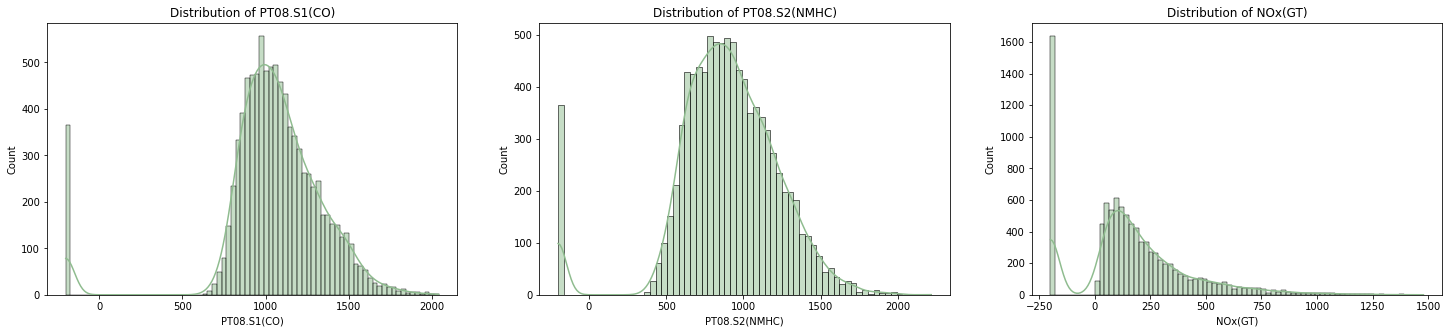

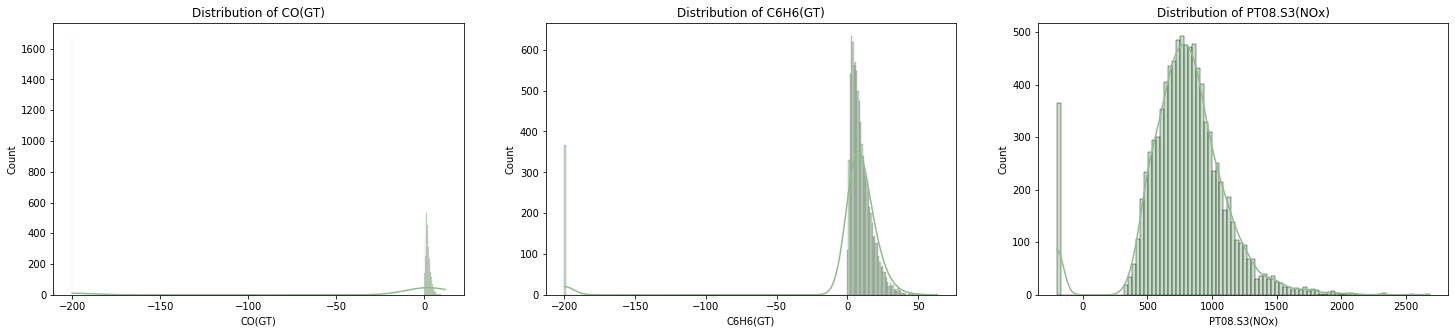

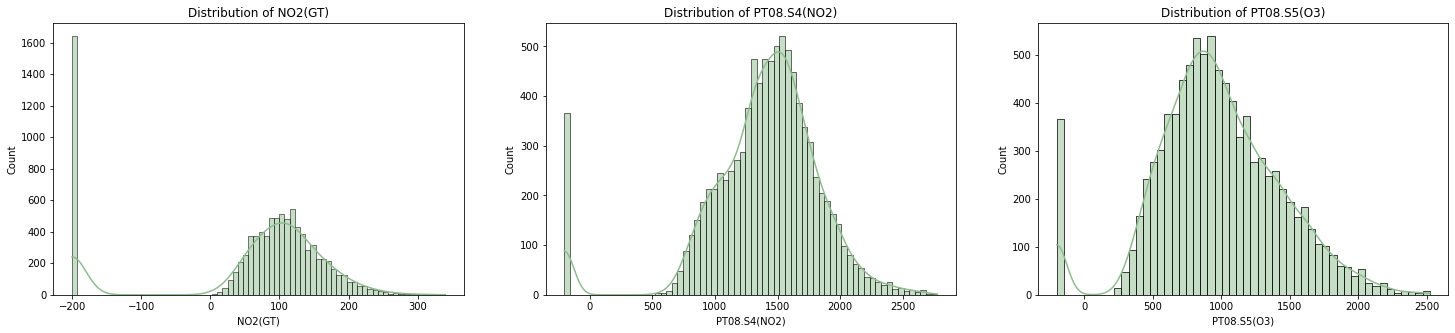

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def showDistributions(category1, category2, category3):
    fig, axes = plt.subplots(1,3, figsize=(25, 5))
    sns.histplot(data=df, x=category1, kde=True, color="darkseagreen", ax=axes[0])
    axes[0].set_title("Distribution of {}".format(category1))
    sns.histplot(data=df, x=category2, kde=True, color="darkseagreen", ax=axes[1])
    axes[1].set_title("Distribution of {}".format(category2))
    sns.histplot(data=df, x=category3, kde=True, color="darkseagreen", ax=axes[2])
    axes[2].set_title("Distribution of {}".format(category3))

showDistributions("PT08.S1(CO)", "PT08.S2(NMHC)", "NOx(GT)")
showDistributions("CO(GT)", "C6H6(GT)", "PT08.S3(NOx)")
showDistributions("NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)")

<AxesSubplot:title={'center':'Correlation Between Air Quality Attributes'}>

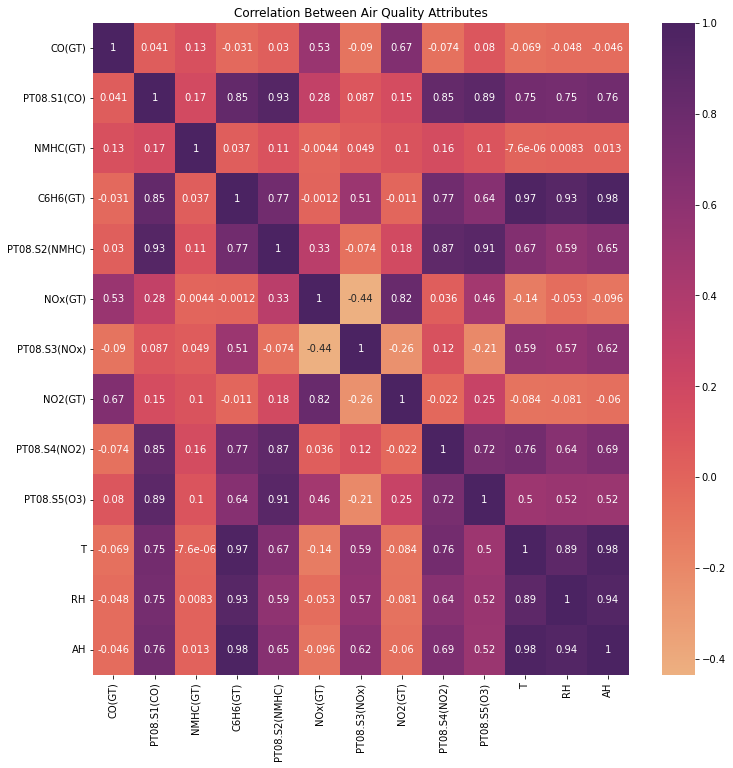

In [ ]:
fig=plt.figure(figsize=(12,12))
plt.title('Correlation Between Air Quality Attributes')
sns.heatmap(df.corr(), annot= True, cmap='flare')

In [ ]:
import plotly.express as px
df2 = df.dropna(axis=1)
fig = px.scatter(df2 ,x='RH' , y= 'T', color='RH' , title='Concentrations over Temperature and Relative Humidity')
fig.show()

In [ ]:
def datatimeCol(d , t):
  return str(d)+ ' '+ str(t)

In [ ]:
dfp = pd.read_excel('AirQualityUCI.xlsx')

In [ ]:
dfp.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [ ]:
dfp['DT'] = dfp['Date'].astype(str)+' '+dfp['Time'].astype(str)
dfp.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DT
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


In [ ]:
dfp.drop('Time', axis=1)

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DT
0,2004-03-10,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,2004-03-10 18:00:00
1,2004-03-10,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,2004-03-10 19:00:00
2,2004-03-10,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,2004-03-10 20:00:00
3,2004-03-10,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,2004-03-10 21:00:00
4,2004-03-10,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,2004-03-10 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,2005-04-04 10:00:00
9353,2005-04-04,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,2005-04-04 11:00:00
9354,2005-04-04,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,2005-04-04 12:00:00
9355,2005-04-04,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,2005-04-04 13:00:00


In [ ]:
dfp['Date'] = dfp['DT']
dfp = dfp.drop('DT', axis=1)
dfp.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
dfp = dfp.drop('Time', axis=1)

In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   NMHC(GT)       9357 non-null   int64  
 4   C6H6(GT)       9357 non-null   float64
 5   PT08.S2(NMHC)  9357 non-null   float64
 6   NOx(GT)        9357 non-null   float64
 7   PT08.S3(NOx)   9357 non-null   float64
 8   NO2(GT)        9357 non-null   float64
 9   PT08.S4(NO2)   9357 non-null   float64
 10  PT08.S5(O3)    9357 non-null   float64
 11  T              9357 non-null   float64
 12  RH             9357 non-null   float64
 13  AH             9357 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1023.5+ KB


In [ ]:
dfp['Date'] = pd.to_datetime(dfp['Date'])

In [ ]:
import plotly.graph_objects as go
def visualizeLineCharts(df, columns, x1, title):   
    columns = columns 
    
    fig = go.Figure([{
    'x': df[x1],
    'y': df[col],
    'name': col
    }  for col in columns], layout=go.Layout(title=go.layout.Title(text=title)))
    
    fig.show()
firstDaydf = dfp[:6].copy()
visualizeLineCharts(firstDaydf, ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)'], 'Date', "Air Pollutant Concentrations Change Over 2004-03-10")

In [ ]:
dfp.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [ ]:
def PT08_S1_CO_Q(t):
  if t<=921.0:
    return "Low"
  elif t<=1052.0:
    return "Mid"
  elif t<=1221.25:
    return "High"
  else:
    return "VeryHigh"

In [ ]:
dfp['Label_PT08.S1(CO)'] = dfp['PT08.S1(CO)'].apply(PT08_S1_CO_Q)

In [ ]:
dfp.head()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Label_PT08.S1(CO)
0,2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,VeryHigh
1,2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,VeryHigh
2,2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,VeryHigh
3,2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,VeryHigh
4,2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,VeryHigh


ValueError: ignored

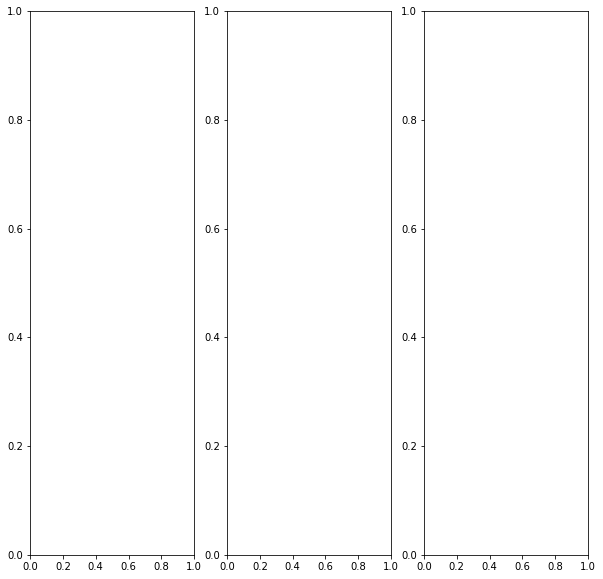

In [ ]:
from seaborn import violinplot
fig, axes = plt.subplots(1,3, figsize=(10, 10))
violinplot(x='Label_PT08.S1(CO)', y='T', data=df2, hue='Label_PT08.S1(CO)', palette='rocket', ax=axes[0])
axes[0].set_title("{} by {}".format('Label_PT08.S1(CO)', 'T'))